In [5]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Summary stats
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Churn class distribution
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [10]:
# Show all column names
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Convert TotalCharges to numeric (invalid parsing will become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many rows became NaN
print(df['TotalCharges'].isna().sum())


11


In [12]:
df = df.dropna(subset=['TotalCharges'])


In [13]:
df.drop(['customerID'], axis=1, inplace=True)


In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [15]:
# Get a list of all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [16]:
df.shape


(7032, 31)

In [17]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
[[916 117]
 [159 215]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy: 0.8038379530916845


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random forest doesn't need scaling

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
[[917 116]
 [180 194]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7896233120113717


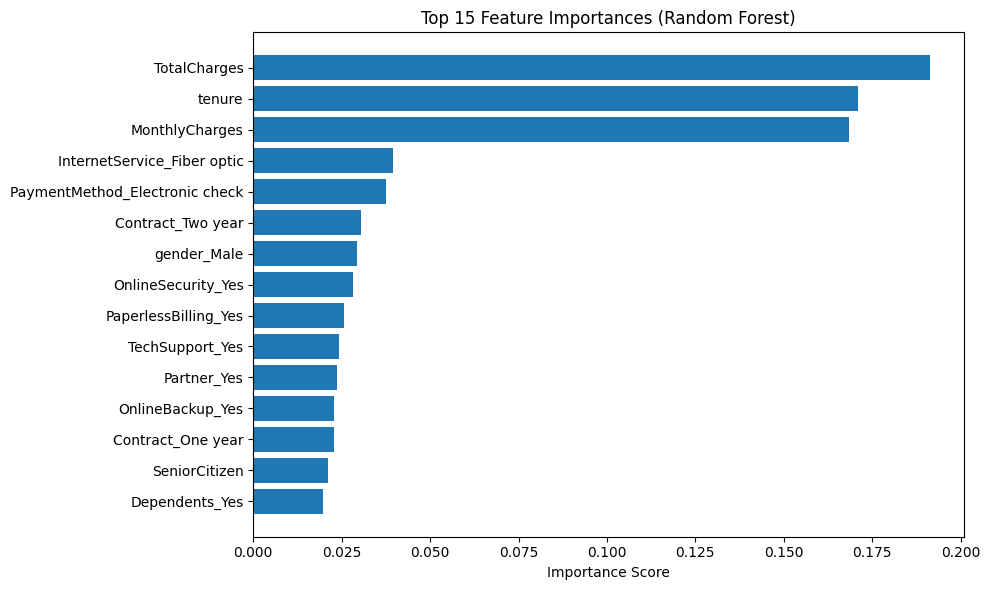

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance values
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]  # Top 15 features

# Plot
plt.figure(figsize=(10,6))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


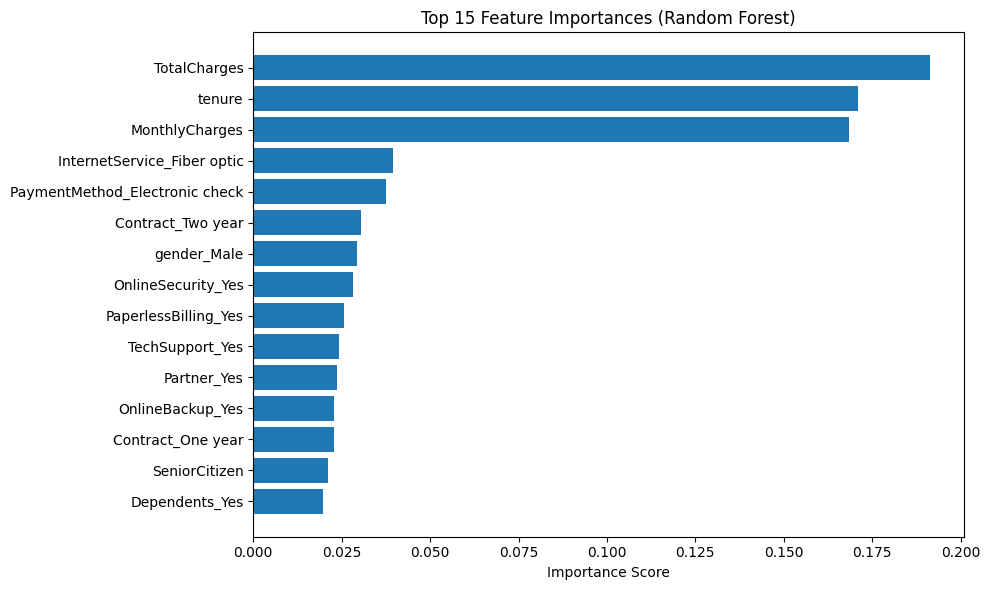

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]

# Plot top 15
plt.figure(figsize=(10,6))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [23]:
!pip install shap
import shap


In [24]:
# Initialize TreeExplainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)


In [25]:
shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [28]:
# Initialize TreeExplainer with the model and data
explainer = shap.TreeExplainer(rf, X_train)

# Calculate SHAP values for test set using predict_proba
shap_values = explainer.shap_values(X_test)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [29]:
# Plot SHAP summary plot for class 1 (assuming binary classification and class 1 is the positive class)
shap.summary_plot(shap_values[1], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [30]:
print("Data types in X_train:")
print(X_train.dtypes)
print("\nData types in X_test:")
print(X_test.dtypes)

# Convert boolean columns to numeric (int) if any exist
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)
for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)

print("\nData types in X_train after conversion:")
print(X_train.dtypes)
print("\nData types in X_test after conversion:")
print(X_test.dtypes)

Data types in X_train:
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bo

In [31]:
import shap

# Initialize TreeExplainer using trained Random Forest
explainer = shap.TreeExplainer(rf)

# Compute SHAP values (for churn = 1 class)
shap_values = explainer.shap_values(X_test)

# Plot summary (global feature importance)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [32]:
print("SHAP shape:", shap_values[1].shape)
print("X_test shape:", X_test.shape)


SHAP shape: (30, 2)
X_test shape: (1407, 30)


In [36]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)

shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

In [37]:
import shap

# Step A: Initialize SHAP explainer
explainer = shap.Explainer(rf, X_test)

# Step B: Compute SHAP values for test set
shap_values = explainer(X_test)

# Step C: Display a bar chart of top features globally
shap.summary_plot(shap_values, X_test, plot_type="bar")

TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

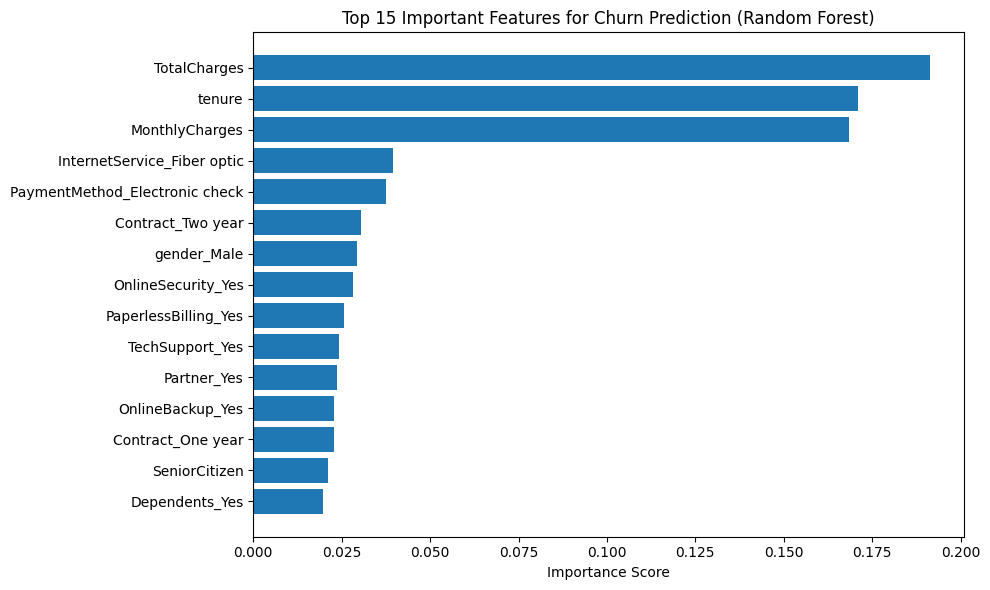

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and select top 15
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Churn Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
